In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Importing dataset, Preprocessing and Variable seperation

In [2]:
pop_data = pd.read_csv('/media/shreyashkharat/Storage Drive/Machine Learning/Python/Projects/Wine Quality Prediction/winequality-red.csv', header = 0)
pop_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
pop_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* From the above description, free SO2 and total SO2 may have outliers. To make sure lets draw boxplots.

<AxesSubplot:xlabel='free sulfur dioxide'>

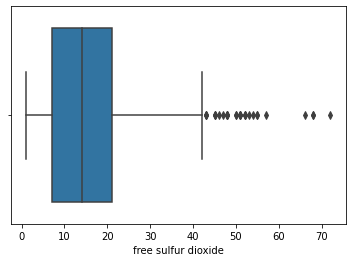

In [4]:
sns.boxplot(x = 'free sulfur dioxide', data = pop_data)

<AxesSubplot:xlabel='total sulfur dioxide'>

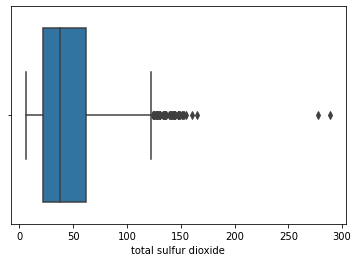

In [5]:
sns.boxplot(x = 'total sulfur dioxide', data = pop_data)

* The plots show that there are considerable amount of outliers.

### Outlier Treatment

In [6]:
pop_data['free_so2'] = pop_data['free sulfur dioxide']
pop_data['total_so2'] = pop_data['total sulfur dioxide']
del pop_data['free sulfur dioxide']
del pop_data['total sulfur dioxide']
pop_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,free_so2,total_so2
0,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,5,11.0,34.0
1,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,5,25.0,67.0
2,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,5,15.0,54.0
3,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,6,17.0,60.0
4,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,5,11.0,34.0


In [7]:
max_free_so2 = np.percentile(pop_data.free_so2, [99])[0]
pop_data.free_so2[pop_data.free_so2 > max_free_so2] = max_free_so2
max_total_so2 = np.percentile(pop_data.total_so2, [99])[0]
pop_data.total_so2[pop_data.total_so2 > max_total_so2] = max_total_so2

<ipython-input-7-d8b4c646f098>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_data.free_so2[pop_data.free_so2 > max_free_so2] = max_free_so2
<ipython-input-7-d8b4c646f098>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_data.total_so2[pop_data.total_so2 > max_total_so2] = max_total_so2


In [8]:
pop_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,free_so2,total_so2
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,0.996747,3.311113,0.658149,10.422983,5.636023,15.807580,46.239525
std,1.741096,0.179060,0.194801,1.409928,0.047065,0.001887,0.154386,0.169507,1.065668,0.807569,10.190936,31.818151
min,4.600000,0.120000,0.000000,0.900000,0.012000,0.990070,2.740000,0.330000,8.400000,3.000000,1.000000,6.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,0.995600,3.210000,0.550000,9.500000,5.000000,7.000000,22.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,0.996750,3.310000,0.620000,10.200000,6.000000,14.000000,38.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,0.997835,3.400000,0.730000,11.100000,6.000000,21.000000,62.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,1.003690,4.010000,2.000000,14.900000,8.000000,50.020000,145.000000


#### As per requirement, a wine with quality greater than 6.5 is considered good. Our goal is to classify whether the wine is good or not.

In [9]:
pop_data['quality_bool'] = 0

In [10]:
pop_data.quality_bool[pop_data.quality > 6.5] = 1

<ipython-input-10-2c8d3872a478>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_data.quality_bool[pop_data.quality > 6.5] = 1


In [11]:
del pop_data['quality']
pop_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,free_so2,total_so2,quality_bool
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,0.996747,3.311113,0.658149,10.422983,15.807580,46.239525,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,0.001887,0.154386,0.169507,1.065668,10.190936,31.818151,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,0.990070,2.740000,0.330000,8.400000,1.000000,6.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,0.995600,3.210000,0.550000,9.500000,7.000000,22.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,0.996750,3.310000,0.620000,10.200000,14.000000,38.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,0.997835,3.400000,0.730000,11.100000,21.000000,62.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,1.003690,4.010000,2.000000,14.900000,50.020000,145.000000,1.000000


### Variable Seperation and Train Test Split

In [12]:
x = pop_data.loc[:, pop_data.columns != 'quality_bool']
y = pop_data['quality_bool']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Logistic Model

In [14]:
from sklearn.linear_model import LogisticRegression
model_logi = LogisticRegression()
model_logi.fit(x_train, y_train)

/home/shreyashkharat/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Predictions
logi_predict_train = model_logi.predict(x_train)
logi_predict_test = model_logi.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_train, logi_predict_train)

array([[1061,   31],
       [ 132,   55]])

In [17]:
confusion_matrix(y_test, logi_predict_test)

array([[282,   8],
       [ 19,  11]])

### Performance of Logistic Model

In [18]:
accuracy_logi_test = accuracy_score(y_test, logi_predict_test)
accuracy_logi_train = accuracy_score(y_train, logi_predict_train)
accuracy_logi_train, accuracy_logi_test

(0.872556684910086, 0.915625)

In [19]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score
precision_score(y_test, logi_predict_test)
# Precision score is a scale of ability of model not to classify false obs. as true.

0.5789473684210527

In [20]:
recall_score(y_test, logi_predict_test)
# Recall score is a scale of ability of model to predict the true obs.

0.36666666666666664

In [21]:
roc_auc_score(y_test, logi_predict_test)
# Area under Reciever Operator Chaaracteristic curve.

0.6695402298850575

## Linear Discriminant Analysis

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
model_lda = lda()
model_lda.fit(x_train, y_train)
lda_predict_train = model_lda.predict(x_train)
lda_predict_test = model_lda.predict(x_test)

In [23]:
confusion_matrix(y_train, lda_predict_train)

array([[1033,   59],
       [ 105,   82]])

In [24]:
confusion_matrix(y_test, lda_predict_test)

array([[271,  19],
       [ 17,  13]])

### Performance of Linear Discriminant Analysis

In [25]:
accuracy_lda_train = accuracy_score(y_train, lda_predict_train)
accuracy_lda_test = accuracy_score(y_test, lda_predict_test)
accuracy_lda_train, accuracy_lda_test

(0.8717748240813136, 0.8875)

In [26]:
precision_score(y_test, lda_predict_test)
# Precision score is a scale of ability of model not to classify false obs. as true.

0.40625

In [27]:
recall_score(y_test, lda_predict_test)
# Recall score is a scale of ability of model to predict the true obs.

0.43333333333333335

In [28]:
roc_auc_score(y_test, lda_predict_test)
# Area under Reciever Operator Chaaracteristic curve.

0.6839080459770114

## K Nearest Neighbors

### Scaling of data

In [29]:
from sklearn import preprocessing
scaler_train = preprocessing.StandardScaler().fit(x_train)
x_train_scaled  = scaler_train.transform(x_train)
scaler_test = preprocessing.StandardScaler(). fit(x_test)
x_test_scaled = scaler_test.transform(x_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import GridSearchCV
n_neighbors_grid = {'n_neighbors' : range(1,16,1)}
grid_knn_search = GridSearchCV(knn(), n_neighbors_grid)

In [31]:
grid_knn_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 16)})

In [32]:
grid_knn_search.best_params_

{'n_neighbors': 2}

In [33]:
optimised_model_knn = grid_knn_search.best_estimator_
knn_predict_train = optimised_model_knn.predict(x_train)
knn_predict_test = optimised_model_knn.predict(x_test)

### Performance of Optimised KNN Model

In [34]:
accuracy_knn_train = accuracy_score(y_train, knn_predict_train)
accuracy_knn_test = accuracy_score(y_test, knn_predict_test)
accuracy_knn_train, accuracy_knn_test

(0.9288506645817045, 0.909375)

In [35]:
precision_score(y_test, knn_predict_test)
# Precision score is a scale of ability of model not to classify false obs. as true.

0.5333333333333333

In [36]:
recall_score(y_test, knn_predict_test)
# Recall score is a scale of ability of model to predict the true obs.

0.26666666666666666

In [37]:
roc_auc_score(y_test, knn_predict_test)
# Area under Reciever Operator Chaaracteristic curve.

0.621264367816092

Each of the three models have their own merits, the required model can be selected as per application.